This notebook demostrates the creation of some Extensive Form Games (EFGs), all of them versions of the Iterated Prisoner's Dilemma game, from the Prolog description of an action situation according to the syntax of *if-then-where* rules.

In [1]:
import os
import sys
ngames_path = os.path.abspath(os.path.join(os.getcwd(), '../../..', 'ngames'))
sys.path.append(ngames_path)

In [2]:
from extensivegames import plot_game
from build import build_full_game
from equilibrium import minimize_incentives, subgame_perfect_equilibrium

# Default rules

Agent are allowed to cooperate and defect whenever.

In [3]:
game_ipd_default = build_full_game('.', 'ipd', threshold=0)

In [4]:
def set_utility(game):
    r"""Set the utility of the game at the terminal nodes.
    
    Set the utility at the terminal nodes to the payoff the agents have
    received. Other possibilities are possible (e.g. consider equality).
    """
    for n in game.game_tree.terminal_nodes:
        node_utility = {}
        facts = game.node_info[n]
        for f in facts:
            predicate = f.split('(')[0]
            args = f.split('(')[1][:-1].split(', ')
            if predicate == 'payoff':
                node_utility[args[0]] = float(args[1])
        game.set_utility(n, node_utility)
        
set_utility(game_ipd_default)

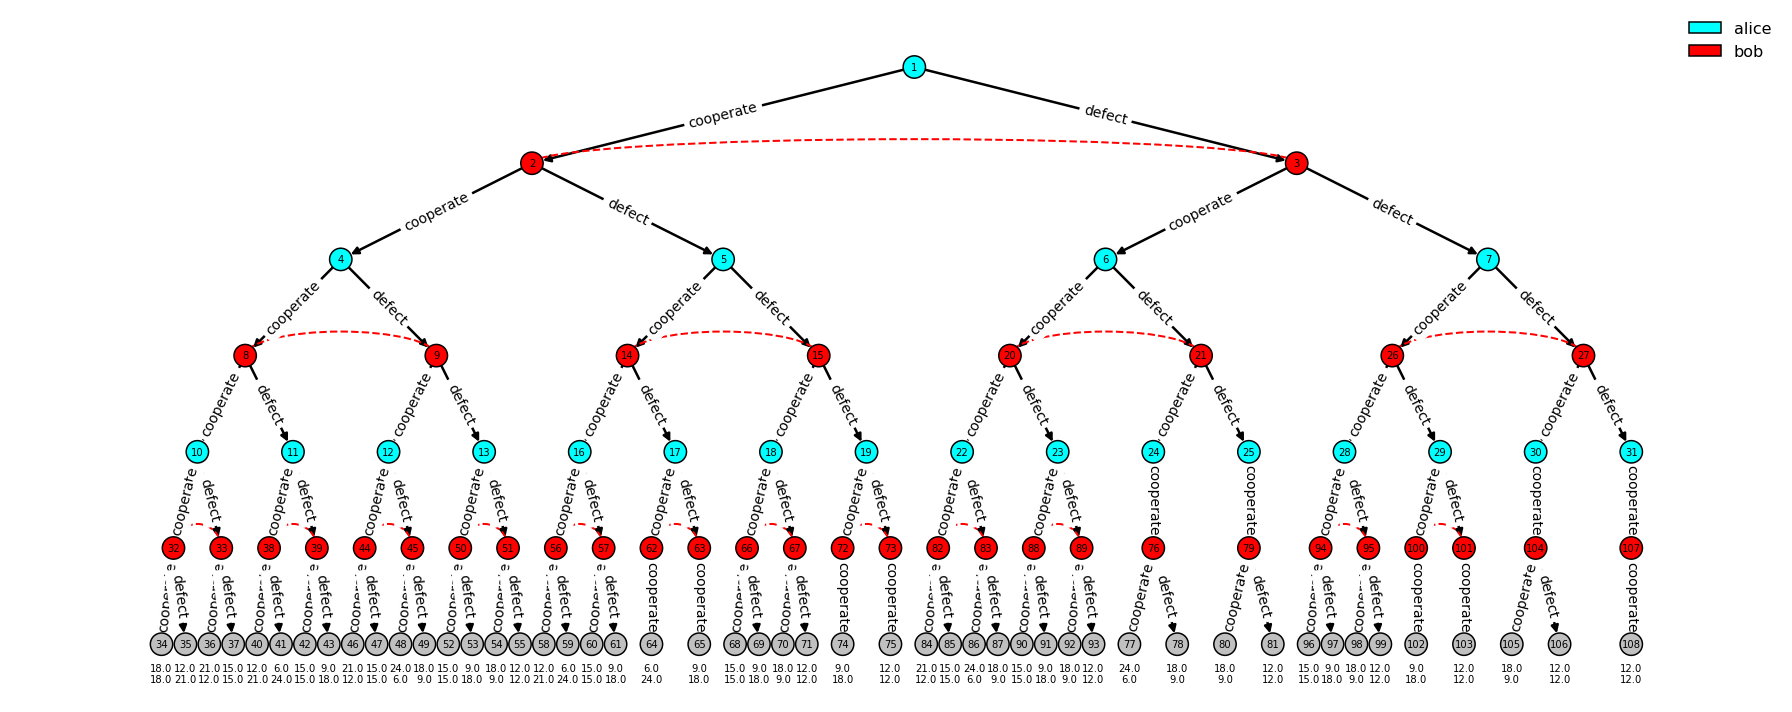

In [5]:
position_colors =  {'alice':'cyan', 'bob':'red'}

# default keywords for rendering the figure
my_fig_kwargs = dict(figsize=(25,10), frameon=False, tight_layout=True)
my_node_kwargs = dict(font_size=10, node_size=500, edgecolors='k',
                      linewidths=1.5)
my_edge_kwargs = dict(arrowsize=15, width=2.5)
my_edge_labels_kwargs = dict(font_size=14)
my_patch_kwargs = dict(linewidth=1.5)
my_legend_kwargs = dict(fontsize=16, loc='upper right', edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=10)
my_info_sets_kwargs = dict(linestyle='--', linewidth=2)

fig = plot_game(game_ipd_default, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

In [6]:
# fig.savefig('ipd_default.png', bbox_inches='tight', dpi=500)

In [7]:
game_ipd_default.node_info

{1: ['consecutiveDefections(alice, 0)',
  'consecutiveDefections(bob, 0)',
  'payoff(alice, 0)',
  'payoff(bob, 0)',
  'rounds(0)'],
 4: ['consecutiveDefections(alice, 0)',
  'consecutiveDefections(bob, 0)',
  'payoff(alice, 6.0)',
  'payoff(bob, 6.0)',
  'rounds(1.0)'],
 5: ['consecutiveDefections(alice, 0)',
  'consecutiveDefections(bob, 1.0)',
  'payoff(alice, 0.0)',
  'payoff(bob, 9.0)',
  'rounds(1.0)'],
 6: ['consecutiveDefections(alice, 1.0)',
  'consecutiveDefections(bob, 0)',
  'payoff(alice, 9.0)',
  'payoff(bob, 0.0)',
  'rounds(1.0)'],
 7: ['consecutiveDefections(alice, 1.0)',
  'consecutiveDefections(bob, 1.0)',
  'payoff(alice, 3.0)',
  'payoff(bob, 3.0)',
  'rounds(1.0)'],
 10: ['consecutiveDefections(alice, 0)',
  'consecutiveDefections(bob, 0)',
  'payoff(alice, 12.0)',
  'payoff(bob, 12.0)',
  'rounds(2.0)'],
 11: ['consecutiveDefections(alice, 0)',
  'consecutiveDefections(bob, 1.0)',
  'payoff(alice, 6.0)',
  'payoff(bob, 15.0)',
  'rounds(2.0)'],
 12: ['consecutive

In [8]:
subgame_mixed_strat, back_utilities, incentives = subgame_perfect_equilibrium(game_ipd_default, minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print()

At node 10: f(s)=0.000
alice: {'cooperate': 0.0, 'defect': 1.0}
bob: {'cooperate': 5.1514348342607263e-14, 'defect': 0.9999999999999485}

At node 11: f(s)=0.000
alice: {'cooperate': 0.0, 'defect': 1.0}
bob: {'cooperate': 0.0, 'defect': 1.0}

At node 12: f(s)=0.000
alice: {'cooperate': 1.5543122344752192e-15, 'defect': 0.9999999999999983}
bob: {'cooperate': 0.0, 'defect': 1.0}

At node 13: f(s)=0.000
alice: {'cooperate': 3.9757086511826856e-13, 'defect': 0.9999999999996024}
bob: {'cooperate': 1.41886502547095e-13, 'defect': 0.9999999999998587}

At node 16: f(s)=0.000
alice: {'cooperate': 2.5146551507759796e-13, 'defect': 0.9999999999997485}
bob: {'cooperate': 1.8607337892717624e-13, 'defect': 0.9999999999998145}

At node 17: f(s)=0.000
alice: {'cooperate': 0.0, 'defect': 1.0}
bob: {'cooperate': 1.0}

At node 18: f(s)=0.000
alice: {'cooperate': 1.587618925213974e-14, 'defect': 0.9999999999999841}
bob: {'cooperate': 1.354472090042691e-14, 'defect': 0.9999999999999867}

At node 19: f(s)=0.

# Limit consecutive defections

Agent are not allowed to defect more than twice in a row.

In [9]:
game_ipd_limit_defections = build_full_game('.', 'ipd', threshold=1)
set_utility(game_ipd_limit_defections)

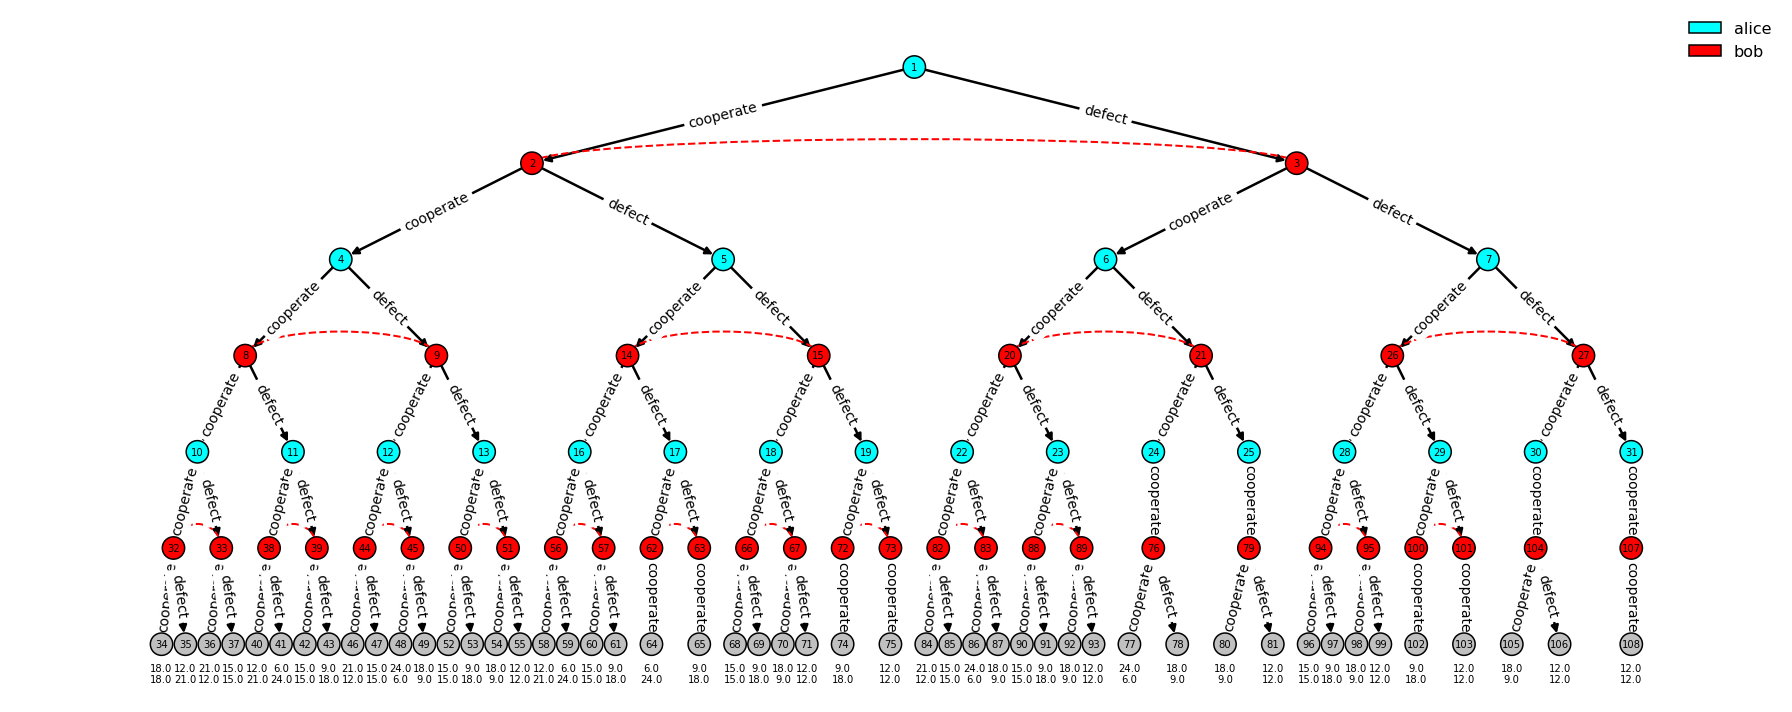

In [10]:
fig = plot_game(game_ipd_limit_defections, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

In [11]:
# fig.savefig('ipd_limit_defections.png', bbox_inches='tight', dpi=500)

In [12]:
n = 4
for _ in range(10):
    subgame_mixed_strat, back_utilities, _ = subgame_perfect_equilibrium(game_ipd_limit_defections, minimize_incentives)
    print(subgame_mixed_strat[n])
    print(back_utilities[n])
    print()

{'alice': {'cooperate': 2.3869795029440866e-14, 'defect': 0.9999999999999761}, 'bob': {'cooperate': 1.525446435834965e-13, 'defect': 0.9999999999998476}}
{'alice': 12.000000000000929, 'bob': 11.99999999999987}

{'alice': {'cooperate': 0.0, 'defect': 1.0}, 'bob': {'cooperate': 0.0, 'defect': 1.0}}
{'alice': 12.000000000000135, 'bob': 11.999999999999936}

{'alice': {'cooperate': 0.0, 'defect': 1.0}, 'bob': {'cooperate': 0.0, 'defect': 1.0}}
{'alice': 12.0, 'bob': 12.000000000000002}

{'alice': {'cooperate': 0.0, 'defect': 1.0}, 'bob': {'cooperate': 1.2934098236883074e-14, 'defect': 0.9999999999999871}}
{'alice': 12.000000000000032, 'bob': 12.000000000000055}

{'alice': {'cooperate': 3.3306690738754696e-13, 'defect': 0.9999999999996669}, 'bob': {'cooperate': 3.0675462170393075e-13, 'defect': 0.9999999999996937}}
{'alice': 12.000000000000847, 'bob': 12.000000000001084}

{'alice': {'cooperate': 0.0, 'defect': 1.0}, 'bob': {'cooperate': 0.0, 'defect': 1.0}}
{'alice': 12.000000000000117, 'bob

# Penalize mutual defection

If both agents defect, the outcome is *as if* one agent had defected on the other. The agent that acts as the defector is selected randomly.

The generated game for this configuration is limited to 2 rounds.

In [13]:
game_ipd_ban_mutual_defect = build_full_game('.', 'ipd', threshold=2, max_rounds=2)
set_utility(game_ipd_ban_mutual_defect)

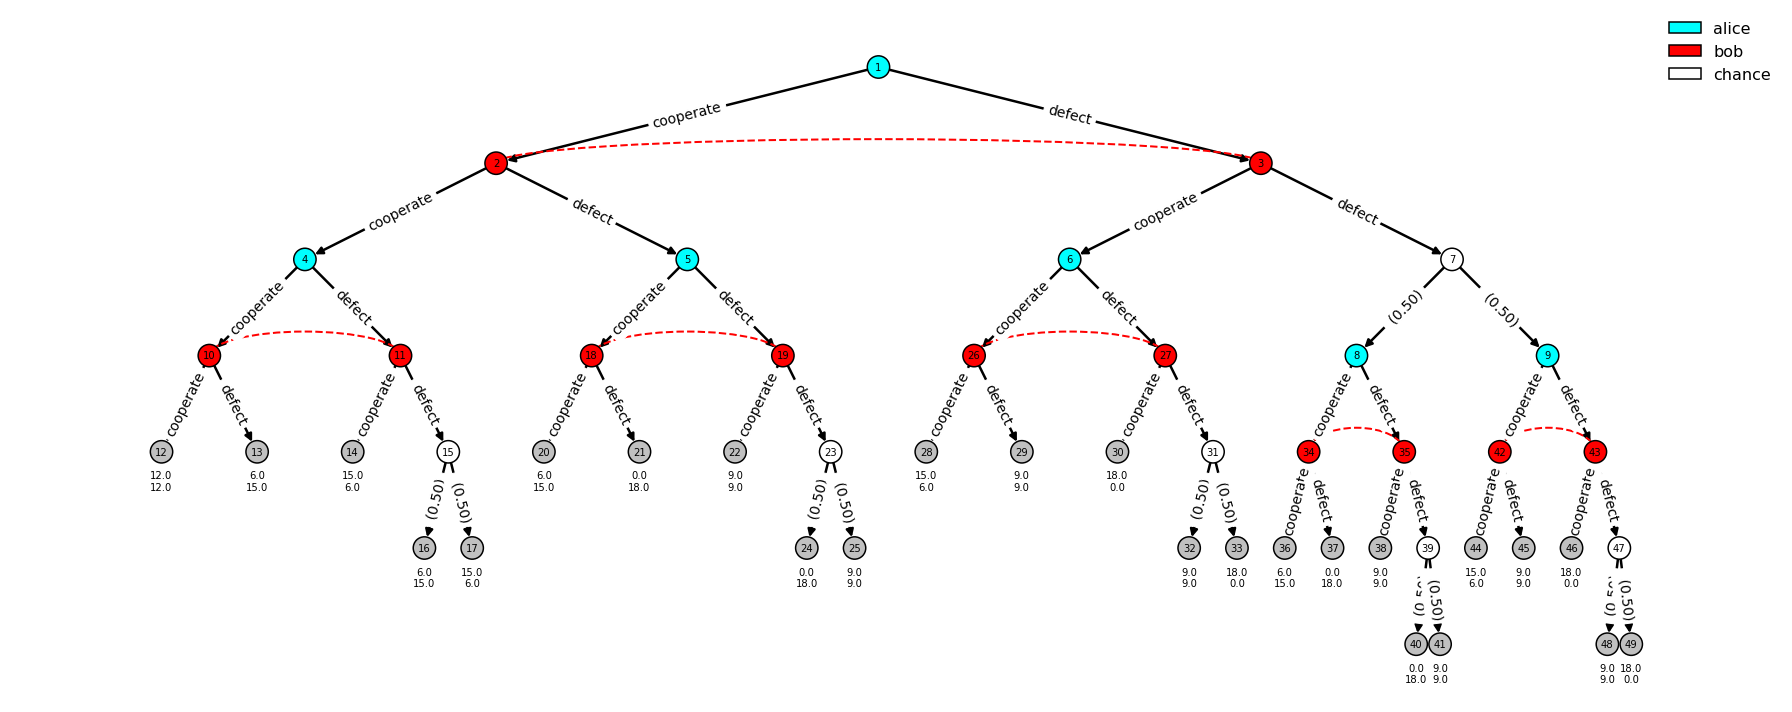

In [14]:
fig = plot_game(game_ipd_ban_mutual_defect, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.08,
                info_sets_kwargs=my_info_sets_kwargs)

In [15]:
# fig.savefig('ipd_ban_mutual_defect.png', bbox_inches='tight', dpi=500)

In [16]:
subgame_mixed_strat, back_utilities, incentives = subgame_perfect_equilibrium(game_ipd_ban_mutual_defect, minimize_incentives)

for node, mixed_strategy_profile in subgame_mixed_strat.items():
    print("At node {}: f(s)={:.3f}".format(node, incentives[node]))
    for player, player_strat in mixed_strategy_profile.items():
        print("{}: {}".format(player, player_strat))
    print()

At node 4: f(s)=0.000
alice: {'cooperate': 4.107825191113079e-15, 'defect': 0.9999999999999959}
bob: {'cooperate': 0.0, 'defect': 1.0}

At node 5: f(s)=0.000
alice: {'cooperate': 0.0, 'defect': 1.0}
bob: {'cooperate': 0.0, 'defect': 1.0}

At node 6: f(s)=0.000
alice: {'cooperate': 4.440892098500626e-14, 'defect': 0.9999999999999556}
bob: {'cooperate': 2.353672812205332e-13, 'defect': 0.9999999999997649}

At node 8: f(s)=0.000
alice: {'cooperate': 6.616929226765933e-14, 'defect': 0.9999999999999338}
bob: {'cooperate': 1.1646239528317892e-13, 'defect': 0.9999999999998839}

At node 9: f(s)=0.000
alice: {'cooperate': 0.0, 'defect': 1.0}
bob: {'cooperate': 0.0, 'defect': 1.0}

At node 1: f(s)=0.000
alice: {'cooperate': 1.1185496973098452e-13, 'defect': 0.9999999999998882}
bob: {'cooperate': 6.827871601444713e-14, 'defect': 0.9999999999999318}

